In [1]:
#Import our dependencies 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
#import csv fil
data_df= pd.read_csv("crypto_data.csv")

In [3]:
data_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
#Filter to get only the coins being traded
data_filter= data_df[data_df["IsTrading"]==True]

In [5]:
data_filter.IsTrading.value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
clean_data= data_filter.drop(columns=["IsTrading"])

In [7]:
clean_data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
clean_data.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [9]:
#drop any null values
clean_data=clean_data.dropna()

In [10]:
# Find null values
for column in clean_data.columns:
    print(f"Column {column} has {clean_data[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [11]:
clean_data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
#Filter to get only Total Coins Mined greater than 0
clean_data=clean_data[clean_data["TotalCoinsMined"]>0]

In [13]:
clean_data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [14]:
#dropping the coin name and unnamed columns
clean_data=clean_data.drop(columns=["CoinName", "Unnamed: 0"])

In [15]:
clean_data.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [16]:
#convert the two columns to numberical type
Clean_data_df = pd.get_dummies(clean_data, columns=['Algorithm', 'ProofType'])
Clean_data_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Clean_data_df)

In [28]:
#Dimensionality Reduction
# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the data.
scaled_pca = pca.fit_transform(scaled_data)

In [29]:
# Transform PCA data to a DataFrame
crypto_pca = pd.DataFrame(
    data=scaled_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
crypto_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.333759,1.063744,-0.600032
1,-0.317082,1.063716,-0.600547
2,2.309145,1.588744,-0.701442
3,-0.143173,-1.345555,0.157281
4,-0.143256,-2.078631,0.311703


In [33]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02793088, 0.02138578, 0.02049791])

#### Sample Analysis
According to the explained variance, all principal componentd contain approximately 2 % of the variance.We have a low % of the information from the original dataset, and we will see whether increasing the number of principal components will increase the explained variance.

In [21]:
# Initialize PCA model and preserve 90% of original data
pca_best = PCA(n_components=.90)

# Get two principal components for the iris data.
scaled_pca_best = pca_best.fit_transform(scaled_data)

In [22]:
# Transform PCA data to a DataFrame
crypto_pca_best = pd.DataFrame(data=scaled_pca_best)
crypto_pca_best.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.283066e-14,-1.997025e-14,7.900266e-12,-0.007129,-1.319756,-0.051813,...,-2.368958e-15,-1.445089e-15,-4.418027e-15,3.772304e-15,-3.592104e-15,-8.706285e-15,-3.133180e-15,9.597393e-16,1.975755e-15,-3.716052e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.295626e-14,-2.003594e-14,7.835457e-12,-0.007739,-1.322514,-0.056674,...,-1.116486e-15,-1.711730e-15,-4.312173e-15,3.969410e-15,-3.877941e-15,-8.881044e-15,-3.547644e-15,5.430613e-16,1.997793e-15,-3.116270e-15
2,2.305468,1.656383,-0.683617,0.004731,-3.256411e-14,-2.971927e-14,2.680680e-11,-0.054781,-1.542879,-0.943951,...,1.027446e-13,-9.066971e-15,-2.310298e-15,-8.799507e-14,9.239465e-15,1.920804e-13,6.046412e-14,3.544768e-16,-4.325937e-14,1.657590e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.310566e-15,6.192184e-15,-6.960586e-12,-0.002071,0.281463,0.251862,...,1.471950e-14,4.186262e-15,1.070382e-14,-1.352777e-14,1.961868e-15,3.440548e-14,4.677419e-15,-6.029707e-15,-1.208979e-14,2.350641e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.602225e-14,1.220564e-14,-9.659323e-12,0.027735,0.519099,0.188820,...,1.358106e-13,1.023453e-13,1.566598e-13,-2.339324e-14,-8.663380e-14,-4.885863e-14,-2.649536e-14,-4.654394e-14,-2.088812e-13,-9.403305e-14


In [34]:
# Fetch the explained variance
pca_best.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [35]:
#Get the sum of the variances
# Fetch the explained variance
pca_best.explained_variance_ratio_.sum()

0.901087063826843

In [41]:
#Get the count of features to compare to the first part
len(crypto_pca_best.columns)

74

In comparison to the the 3 original components this one with 74 components preserved 90% of the original dataset. 

In [49]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=45)

In [50]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_best)

In [51]:
# The dataset has 2 columns
tsne_features.shape
#puts everything into 150 rows and 2 columns. We started with 4 columns

(532, 2)

In [54]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_best['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_best['y'] = tsne_features[:,1]


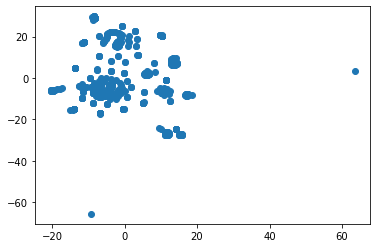

In [48]:
# Visualize the clusters
plt.scatter(crypto_pca_best['x'], crypto_pca_best['y'])
plt.show()

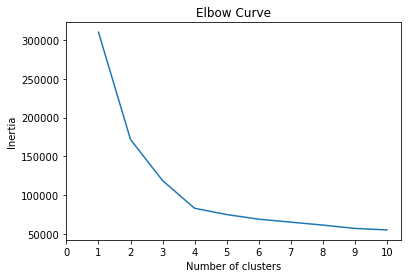

In [65]:
from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_best)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [73]:
# Predicting clusters with k=4. This is the optimal number of clusters from the above scatter plot

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(crypto_pca_best)

# Predict clusters
predictions = model.predict(crypto_pca_best)

# Add the predicted class column to the dataframe
crypto_pca_best["class"] = model.labels_
crypto_pca_best.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,-2.283066e-14,-1.997025e-14,7.900266e-12,-0.007129,-1.319756,-0.051813,...,3.772304e-15,-3.592104e-15,-8.706285e-15,-3.133180e-15,9.597393e-16,1.975755e-15,-3.716052e-15,8.258734,11.661915,1
1,-0.318434,1.032331,-0.591126,0.001386,-2.295626e-14,-2.003594e-14,7.835457e-12,-0.007739,-1.322514,-0.056674,...,3.969410e-15,-3.877941e-15,-8.881044e-15,-3.547644e-15,5.430613e-16,1.997793e-15,-3.116270e-15,15.237423,16.395416,1
2,2.305468,1.656383,-0.683617,0.004731,-3.256411e-14,-2.971927e-14,2.680680e-11,-0.054781,-1.542879,-0.943951,...,-8.799507e-14,9.239465e-15,1.920804e-13,6.046412e-14,3.544768e-16,-4.325937e-14,1.657590e-14,20.141611,19.982994,1
3,-0.145184,-1.320593,0.192813,-0.001229,7.310566e-15,6.192184e-15,-6.960586e-12,-0.002071,0.281463,0.251862,...,-1.352777e-14,1.961868e-15,3.440548e-14,4.677419e-15,-6.029707e-15,-1.208979e-14,2.350641e-15,-6.487747,34.771130,3
4,-0.151768,-2.036192,0.396182,-0.001705,1.602225e-14,1.220564e-14,-9.659323e-12,0.027735,0.519099,0.188820,...,-2.339324e-14,-8.663380e-14,-4.885863e-14,-2.649536e-14,-4.654394e-14,-2.088812e-13,-9.403305e-14,0.191885,-24.458406,0


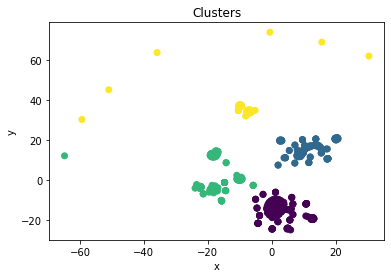

In [82]:
# Visualize the clusters
plt.scatter(crypto_pca_best["x"],crypto_pca_best["y"], c=crypto_pca_best['class'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters')
plt.show()

In [80]:
#print count for each cluster
crypto_pca_best["class"].value_counts()

0    194
1    146
2    136
3     56
Name: class, dtype: int64

Based on the above results the cryptocurrency can be clustered togther into 4 different clusters. 